In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
excel_file_path = '/content/drive/MyDrive/data_opt.xlsx'
df = pd.read_excel(excel_file_path)
df_1 = pd.read_excel(excel_file_path)

In [ ]:
# @title
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import t

# Generate example data
np.random.seed(0)
data = df['BFG']

# Split the data into training (first 900) and test (next 100) sets
train_data = data[:900]
test_data = data[900:]

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
model.fit(np.arange(900).reshape(-1, 1), train_data)

# Predict the next 100 data points
predictions = model.predict(np.arange(900, 1000).reshape(-1, 1))

# Calculate the standard error of predictions
std_error = np.std(predictions)

# Calculate the t-score for a 99% confidence interval
t_score = t.ppf(0.995, df=len(test_data) - 1)

# Calculate the margin of error
margin_of_error = t_score * (std_error / np.sqrt(len(test_data)))

# Calculate the lower and upper bounds of the confidence interval
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error

# Print the predictions and confidence interval
for i, pred in enumerate(predictions):
    print(f"Data Point {i+1}: Prediction = {pred:.4f}, 99% CI [{lower_bound[i]:.4f}, {upper_bound[i]:.4f}]")


In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import t


data=df['BFG']
# Split the data into training (first 900) and test (next 100) sets
train_data = data[:900]
test_data = data[900:]

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=30, random_state=0)

# Fit the model on the training data
model.fit(np.arange(900).reshape(-1, 1), train_data)

# Predict the next 100 data points
predictions = model.predict(np.arange(900, 1000).reshape(-1, 1))

# Calculate the standard error of predictions
std_error = np.std(predictions)

# Calculate the t-score for a 99% confidence interval
t_score = t.ppf(0.995, df=len(test_data) - 1)

# Calculate the margin of error
margin_of_error = t_score * (std_error / np.sqrt(len(test_data)))

# Calculate the lower and upper bounds of the confidence interval
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error

# Create a time index for the data points
time_index = np.arange(1000)

# Plot the original data
plt.figure(figsize=(10, 6))
#plt.scatter(time_index[:900], train_data, label='Original Data (Training)', color='blue')
plt.scatter(time_index[900:], test_data, label='Original Data (Test)', color='green')

# Plot the predicted values
plt.plot(time_index[900:], predictions, label='Predictions', color='red')

# Plot the confidence interval
plt.fill_between(time_index[900:], lower_bound, upper_bound, color='orange', alpha=0.5, label='99% Confidence Interval')

# Add labels and legend
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Original Data with Predictions and 99% Confidence Interval')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
margin_of_error

2.985877309112295e-14

# ARIMA and Seasonal ARIMA

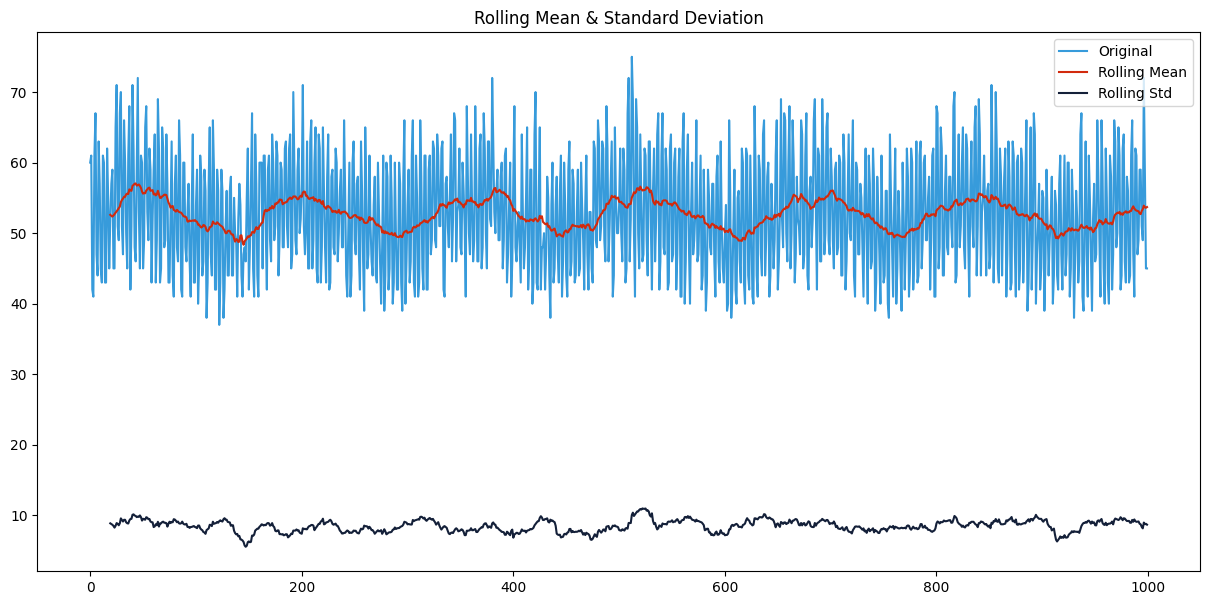

In [ ]:
#Determine rolling statistics
df["rolling_avg"] = df["LDG"].rolling(window=20).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df["LDG"].rolling(window=20).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["LDG"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['BFG'])

ADF Test Statistic : -5.694121227746749
p-value : 7.946320806206701e-07
#Lags Used : 22
Number of Observations Used : 977
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['LDG'])

ADF Test Statistic : -3.6500580942625143
p-value : 0.004873064422971748
#Lags Used : 21
Number of Observations Used : 978
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df['COG'])

ADF Test Statistic : -2.7358258140790754
p-value : 0.0680413456514765
#Lags Used : 18
Number of Observations Used : 981
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


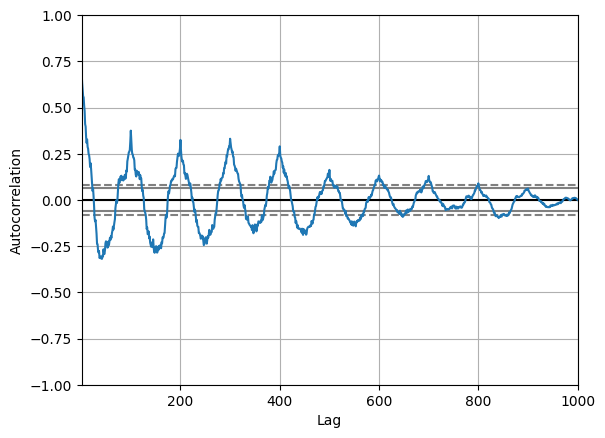

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['BFG'][:])
plt.show()

#  Augmented Dickey-Fuller (ADF)

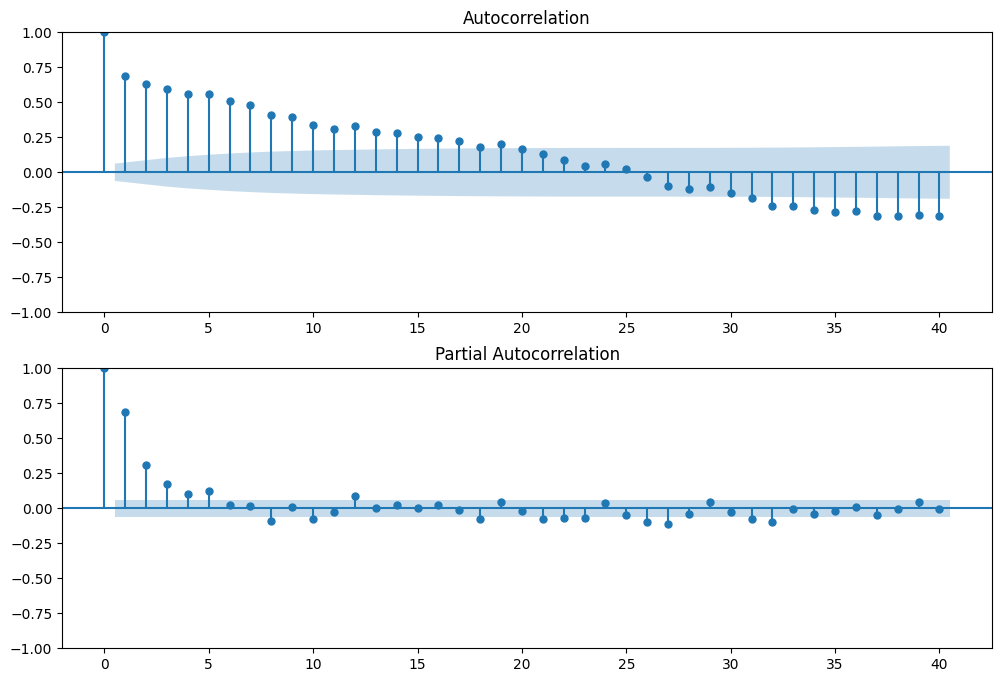

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['BFG'].iloc[:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['BFG'].iloc[:],lags=40,ax=ax2)

In [ ]:
#p=6,q=25

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['BFG'],order=(6,1,25))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    BFG   No. Observations:                 1000
Model:                ARIMA(6, 1, 25)   Log Likelihood               -4706.250
Date:                Thu, 14 Sep 2023   AIC                           9476.500
Time:                        19:12:33   BIC                           9633.516
Sample:                             0   HQIC                          9536.180
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6395      1.220     -0.524      0.600      -3.030       1.751
ar.L2         -0.2705      0.281     -0.961      0.337      -0.822       0.281
ar.L3         -0.1051      0.153     -0.687      0.492      -0.405       0.195
ar.L4          0.2582      0.199      1.297      0.195      -0.132       0.648
ar.L5          0.7054      0.435      1.622      0.105      -0.147       1.558
ar.L6          0.4052      0.725      0.559      0.576      -1.015       1.826
ma.L1          0.0126      1.219      0.010      0.992      -2.376       2.401
ma.L2         -0.1747      0.681     -0.257      0.797      -1.509       1.159
ma.L3         -0.1153      0.259     -0.446      0.656      -0.622       0.392
ma.L4         -0.4042      0.212     -1.909      0.056      -0.819       0.011
ma.L5         -0.5402      0.600     -0.901      0.368      -1.716       0.635
ma.L6          0.0616      0.473      0.130      0.896      -0.865       0.988
ma.L7          0.3274      0.480      0.682      0.495      -0.614       1.268
ma.L8         -0.0341      0.083     -0.410      0.682      -0.197       0.129
ma.L9          0.0016      0.093      0.017      0.986      -0.180       0.183
ma.L10        -0.1260      0.060     -2.083      0.037      -0.245      -0.007
ma.L11        -0.1325      0.168     -0.788      0.431      -0.462       0.197
ma.L12         0.0642      0.104      0.620      0.535      -0.139       0.267
ma.L13         0.0724      0.150      0.484      0.628      -0.221       0.366
ma.L14         0.0842      0.069      1.215      0.224      -0.052       0.220
ma.L15         0.0640      0.073      0.873      0.383      -0.080       0.208
ma.L16         0.0578      0.085      0.676      0.499      -0.110       0.225
ma.L17        -0.0476      0.046     -1.036      0.300      -0.138       0.042
ma.L18        -0.0771      0.080     -0.960      0.337      -0.234       0.080
ma.L19         0.0833      0.066      1.256      0.209      -0.047       0.213
ma.L20         0.0877      0.137      0.638      0.523      -0.182       0.357
ma.L21         0.0137      0.074      0.184      0.854      -0.132       0.159
ma.L22        -0.0339      0.061     -0.557      0.578      -0.153       0.085
ma.L23        -0.1175      0.042     -2.824      0.005      -0.199      -0.036
ma.L24        -0.0718      0.142     -0.504      0.614      -0.351       0.207
ma.L25        -0.0512      0.066     -0.776      0.438      -0.181       0.078
sigma2       722.3401     32.126     22.485      0.000     659.375     785.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.65
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               2.48   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
========================================================

<Axes: >

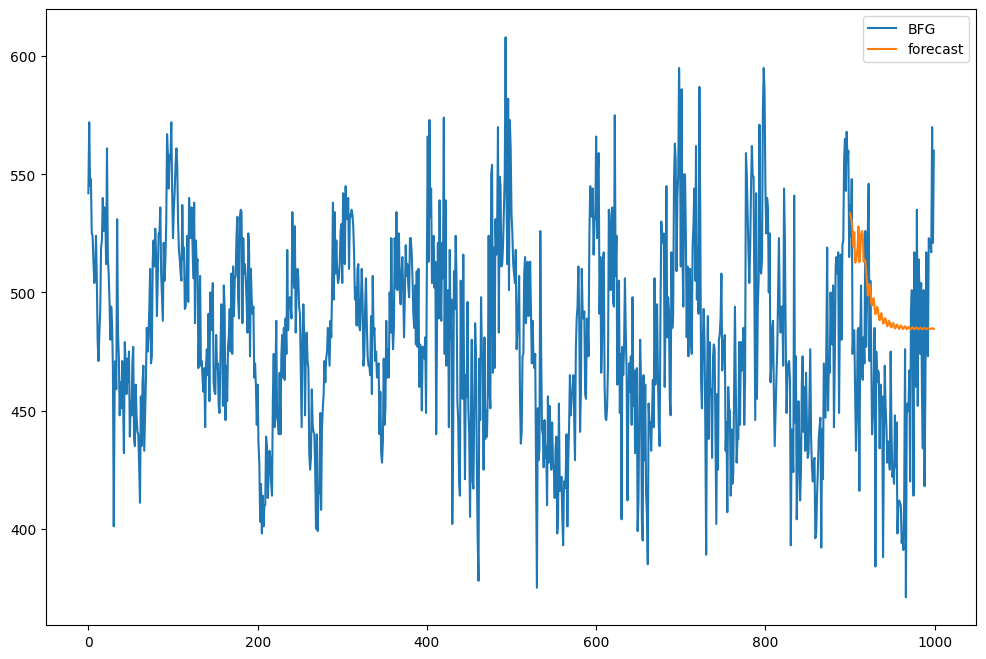

In [ ]:
df['forecast']=model_fit.predict(start=900,end=1000,dynamic=True)
df[['BFG','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['BFG'],order=(3,1,3),seasonal_order=(3,1,3,20))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df['forecast']=results.predict(start=900,end=1000,dynamic=True)
df[['BFG','forecast']].plot(figsize=(12,8))

ValueError: ignored

In [ ]:
df

,period,BFG,LDG,COG,forecast
0,1,542,60,42,NaN
1,2,572,61,41,NaN
2,3,545,42,42,NaN
3,4,548,41,42,NaN
4,5,525,61,42,NaN
...,...,...,...,...,...
995,996,520,49,48,526.429250
996,997,517,72,48,541.092525
997,998,570,59,46,533.860665
998,999,521,45,41,544.744752
